In [35]:
#importing the libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [36]:
#load the dataset and extract the dependent and independent variale
companies=pd.read_csv("1000_Companies.csv")
X=companies.iloc[:,:-1].values #take every rows except for the last column
y=companies.iloc[:,4].values #last row

In [37]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


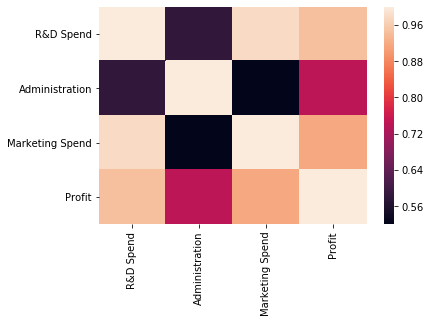

In [38]:
#data visualization
#building the correlation matrix
sns.heatmap(companies.corr())

In [39]:
4# encoding catagorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer 
labelencoder=LabelEncoder()
X[:,3]=labelencoder.fit_transform(X[:,3])
#onehotencoder=OneHotEncoder(categorical_features=[3])
#X=onehotencoder.fit_transform(X[:,3]).toarray()
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [3]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X.tolist())
X = X.astype('float64')

In [40]:
#avoiding the dummy variable trap
X=X[:,1:] #encoder created 2 columns buy we need only one

In [41]:
##splitting the data into train and test set 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2,random_state=0)

In [42]:
#fitting multiple linear regression model to training set
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [43]:
#predicting the test set results
y_pred=model.predict(X_test)
y_pred

array([ 89790.61532916,  88427.07187361,  94894.67836972, 175680.8672561 ,
        83411.73042089, 110571.90200074, 132145.22936439,  91473.37719687,
       164597.05380606,  53222.82667402,  66950.1905099 , 150566.43987004,
       126915.20858596,  59337.85971051, 177513.91053061,  75316.28143051,
       118248.14406603, 164574.40699901, 170937.2898107 , 182069.11645084,
       118845.0325269 ,  85669.95112229, 180992.59396143,  84145.08220145,
       105005.83769214, 101233.56772747,  53831.07669092,  56881.41475225,
        68896.39346905, 210040.00765882, 120778.72270894, 111724.87157654,
       101487.90541518, 137959.02649624,  63969.95996744, 108857.91214126,
       186014.72531987, 171442.64130747, 174644.26529204, 117671.49128195,
        96731.37857433, 165452.25779409, 107724.34331255,  50194.54176914,
       116513.89532179,  58632.48986821, 158416.46827609,  78541.4852161 ,
       159727.66671743, 131137.87699644, 184880.70924515, 174609.08266879,
        93745.66352059,  

In [44]:
#calculating the coefficients
print(model.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [46]:
#calculating the intercept
print(model.intercept_)

-51035.22972401607


In [47]:
#10 calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9112695892268822